Training completed!
Final parameters (theta): [1.05565284e+08 9.57945479e+05 4.23359276e+06 6.33638777e+07
 9.70824464e+07]


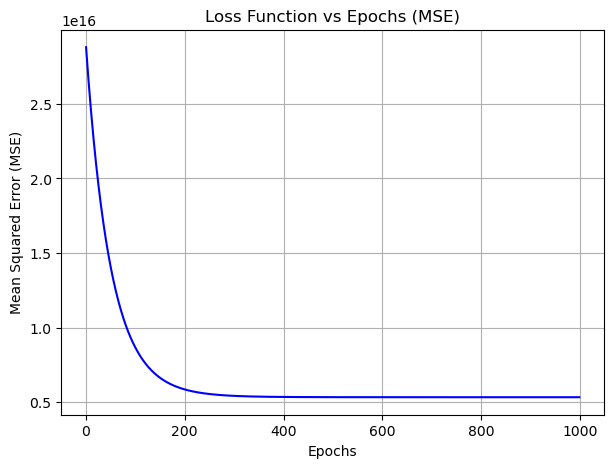

Root Mean Squared Error (RMSE): 75484536.33
R-squared: 0.6915


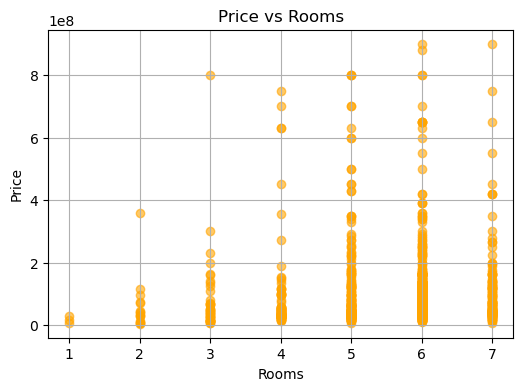

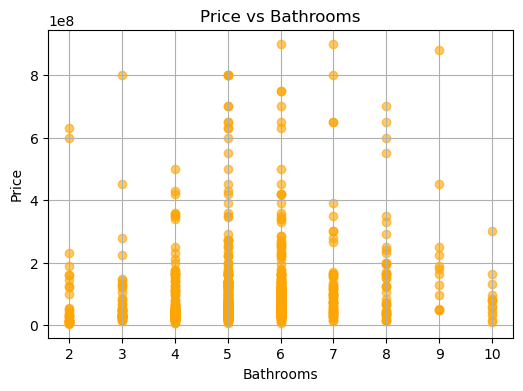

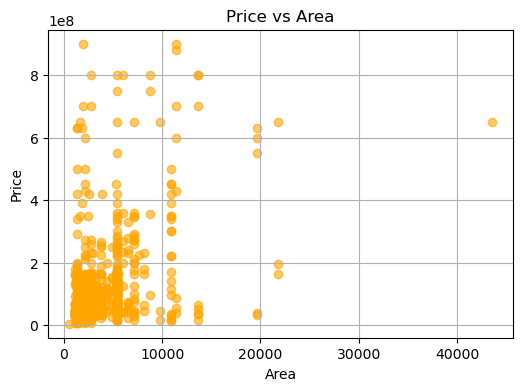

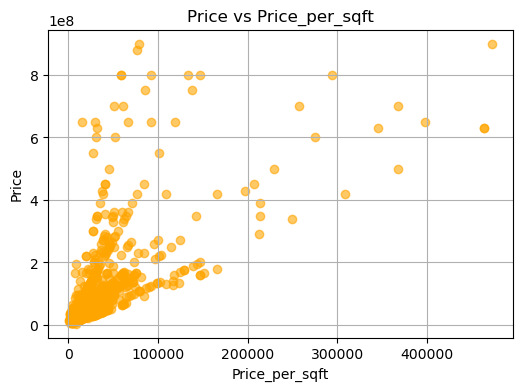

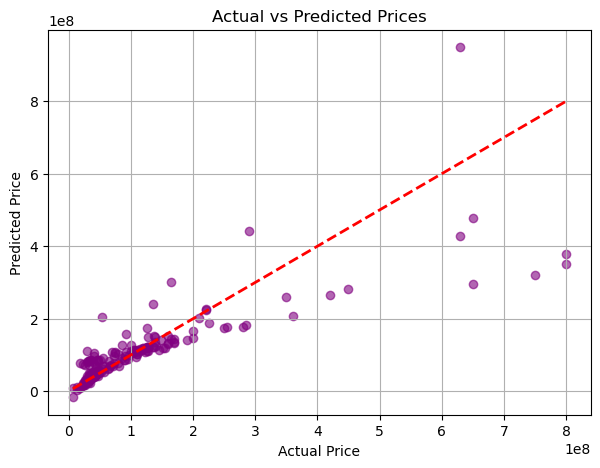

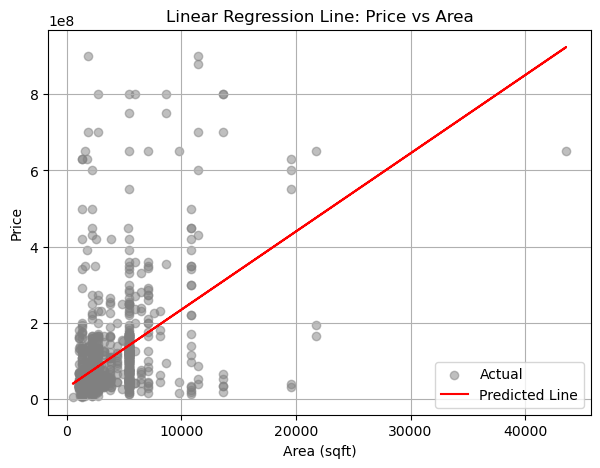

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel("Islamabad_Houses.xlsx")

data["Price_per_sqft"] = data["Price"] / data["Area"]
features = ["Rooms", "Bathrooms", "Area", "Price_per_sqft"]
target = "Price"
data = data[features + [target]].dropna()
feature_means = data[features].mean().values
feature_stds = data[features].std().values

X = data[features].values
y = data[target].values.reshape(-1, 1)
X = (X - feature_means) / feature_stds
X = np.c_[np.ones(X.shape[0]), X]
np.random.seed(42)
shuffle = np.random.permutation(len(X))
X, y = X[shuffle], y[shuffle]

split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
m, n = X_train.shape
theta = np.zeros((n, 1))
alpha = 0.01  
epochs = 1000
def compute_mse(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    mse = np.mean(errors ** 2)
    return mse

loss_history = []

for epoch in range(epochs):
    predictions = X_train.dot(theta)
    errors = predictions - y_train
    gradients = (1 / m) * X_train.T.dot(errors)
    theta -= alpha * gradients
    loss = compute_mse(X_train, y_train, theta)
    loss_history.append(loss)

print("Training completed!")
print("Final parameters (theta):", theta.flatten())

plt.figure(figsize=(7, 5))
plt.plot(range(epochs), loss_history, color='blue')
plt.title("Loss Function vs Epochs (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()


predictions = X_test.dot(theta)
errors = predictions - y_test


rmse = np.sqrt(np.mean(errors ** 2))


ss_res = np.sum(errors ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r_squared:.4f}")


for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(data[feature], data["Price"], color="orange", alpha=0.6)
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()


plt.figure(figsize=(7, 5))
plt.scatter(y_test, predictions, color="purple", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()


plt.figure(figsize=(7, 5))
plt.scatter(data["Area"], data["Price"], color='gray', alpha=0.5, label='Actual')

    
area_idx = features.index("Area")
area_scaled = (data["Area"].values - feature_means[area_idx]) / feature_stds[area_idx]

area_line = np.zeros((len(area_scaled), n))
area_line[:, 0] = 1.0
area_col_in_X = area_idx + 1
area_line[:, area_col_in_X] = area_scaled

pred_line = area_line.dot(theta).flatten()
plt.plot(data["Area"], pred_line, color='red', label='Predicted Line')
plt.title("Linear Regression Line: Price vs Area")
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
